# Analyse BERT-generated results

In [2]:
import pandas as pd
import os
from os.path import join as opj

In [3]:
def make_df(candidate_file, gold_file):
    candidate_lines = []
    gold_lines = []
    with open(candidate_file, 'r', encoding='utf-8') as c_file, open(gold_file, 'r', encoding='utf-8') as g_file:
        candidate_lines = c_file.readlines()
        gold_lines = g_file.readlines()
    step_df = pd.DataFrame({'summary': candidate_lines, 'reference':gold_lines})
    return step_df

In [4]:
def match_data(csv_dir, summs_dir):
    step_to_df = dict()
    for root, _, files in os.walk(summs_dir):
        for file in files:
            if file.endswith('.candidate'):
                candidate_file = opj(root, file)
                gold_file = candidate_file.replace('.candidate', '.gold')
                step_df = make_df(candidate_file, gold_file)
                step_num = int(file[file.find('_step')+5:file.find('.')])
                step_df['length_words'] = step_df['summary'].str.split().str.len()
                scores_sf = pd.read_csv(opj(csv_dir, file.replace('results_step', 'test_res_bertsum_s').replace('.candidate','_2408_1930.csv')))
                total_df = pd.concat([step_df, scores_sf], axis=1)
                step_to_df[step_num] = total_df
    step_to_df = {k: step_to_df[k] for k in sorted(step_to_df.keys())}
    return step_to_df

In [5]:
step_to_df = match_data(opj(os.getcwd(), 'results', 'bert', 'bert_2408'), opj(os.getcwd(), 'results', 'bert', 'bert_summaries_test'))

In [6]:
step_to_df


{5000:                                                summary  \
 0    customer : @virgintrains morning cb have you s...   
 1    customer : @verizonsupport since yesterday whe...   
 2    agent : @ 528448 if you are unable to load int...   
 3    customer : stuck at staines waiting for a read...   
 4    customer : @askplaystation my power went out t...   
 ..                                                 ...   
 104  customer : @uber_support i am curious if when ...   
 105  customer : @virgintrains can you give coach c ...   
 106  i am reviewing the details for the delay on dl...   
 107  agent : @ 260725 unfortunately , our first cla...   
 108  i 've been waiting over 3 weeks for compensati...   
 
                                              reference  length_words  \
 0    customer : @virgintrains morning cb have you s...            35   
 1    customer : @verizonsupport since yesterday whe...            33   
 2    customer : fucking fix your game you stupid cu...          

In [7]:
step_to_df[50000].describe()

,length_words,rouge1_pr,rouge1_re,rouge1_f1,rouge2_pr,rouge2_re,rouge2_f1,rougeL_pr,rougeL_re,rougeL_f1,rougeLsum_pr,rougeLsum_re,rougeLsum_f1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.146789,0.730228,0.525002,0.597122,0.619436,0.439211,0.502614,0.579157,0.417206,0.474132,0.579157,0.417206,0.474132
std,12.749601,0.200296,0.150173,0.147536,0.255170,0.184545,0.198035,0.205681,0.158527,0.161902,0.205681,0.158527,0.161902
min,32.000000,0.229500,0.193000,0.229200,0.000000,0.000000,0.000000,0.130400,0.105300,0.125000,0.130400,0.105300,0.125000
25%,46.000000,0.625000,0.402200,0.489800,0.444400,0.305100,0.377000,0.440700,0.301100,0.372100,0.440700,0.301100,0.372100
50%,53.000000,0.740000,0.533300,0.617600,0.645800,0.456500,0.517500,0.577500,0.400000,0.458300,0.577500,0.400000,0.458300
75%,63.000000,0.877200,0.619000,0.705900,0.787200,0.573000,0.644700,0.734700,0.525400,0.610200,0.734700,0.525400,0.610200
max,109.000000,1.000000,0.973000,0.900000,1.000000,0.944400,0.875000,1.000000,0.973000,0.885700,1.000000,0.973000,0.885700


In [8]:
step_to_df[5000].describe()

,length_words,rouge1_pr,rouge1_re,rouge1_f1,rouge2_pr,rouge2_re,rouge2_f1,rougeL_pr,rougeL_re,rougeL_f1,rougeLsum_pr,rougeLsum_re,rougeLsum_f1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.192661,0.730603,0.529904,0.598784,0.619233,0.444604,0.505114,0.592063,0.430660,0.486137,0.592063,0.430660,0.486137
std,13.210880,0.191851,0.163549,0.150111,0.247644,0.194447,0.200104,0.208072,0.175374,0.170273,0.208072,0.175374,0.170273
min,31.000000,0.203400,0.182900,0.255300,0.053600,0.056600,0.056600,0.084700,0.097600,0.106400,0.084700,0.097600,0.106400
25%,47.000000,0.606600,0.397100,0.500000,0.463400,0.301900,0.378400,0.452400,0.297000,0.348500,0.452400,0.297000,0.348500
50%,54.000000,0.754700,0.537600,0.629400,0.652200,0.474400,0.550300,0.571400,0.409400,0.477900,0.571400,0.409400,0.477900
75%,62.000000,0.864900,0.628900,0.708000,0.783300,0.567600,0.630600,0.736800,0.558800,0.618600,0.736800,0.558800,0.618600
max,105.000000,1.000000,1.000000,0.910000,1.000000,0.969700,0.878800,1.000000,1.000000,0.810300,1.000000,1.000000,0.810300


<Axes: >

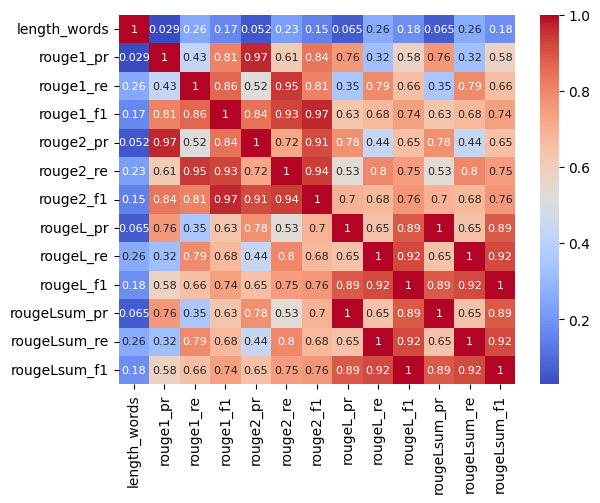

In [9]:
import seaborn as sns
sns.heatmap(step_to_df[50000].select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', annot_kws={"size":8})

In [10]:
num_cols = [col for col in step_to_df[5000].columns if 'rouge' in col]

In [11]:
for col in num_cols:
    rouge1_f1s = {k: float(v[col].mean()) for k, v in step_to_df.items()}
    best_step = max(rouge1_f1s, key=rouge1_f1s.get)
    print("Best", col, "mean score: step", best_step, "=", round(rouge1_f1s[best_step],5))


Best rouge1_pr mean score: step 40000 = 0.75001
Best rouge1_re mean score: step 40000 = 0.54331
Best rouge1_f1 mean score: step 40000 = 0.61496
Best rouge2_pr mean score: step 40000 = 0.64967
Best rouge2_re mean score: step 45000 = 0.46444
Best rouge2_f1 mean score: step 40000 = 0.52778
Best rougeL_pr mean score: step 5000 = 0.59206
Best rougeL_re mean score: step 5000 = 0.43066
Best rougeL_f1 mean score: step 5000 = 0.48614
Best rougeLsum_pr mean score: step 5000 = 0.59206
Best rougeLsum_re mean score: step 5000 = 0.43066
Best rougeLsum_f1 mean score: step 5000 = 0.48614


In [12]:
# step_to_df[50000]['index'] = step_to_df[50000].index
from matplotlib import pyplot as plt
def disp_rouge_plot(cols_to_display, step_to_df, title):
    for col in cols_to_display:
        plt.plot(range(0, len(step_to_df.keys())), [step_to_df[steps][col].mean() for steps in range(5000, 50001, 5000)], label=col)
    # plt.scatter(step_to_df[50000].index, step_to_df[50000].sort_values(by='rougeL_f1')['rougeL_f1'])
    plt.xlabel("Steps")
    plt.ylabel("Score")
    plt.xticks(ticks=range(0,10,1), labels=range(5000, 50001, 5000))
    plt.title(title)
    plt.legend()
    plt.show()


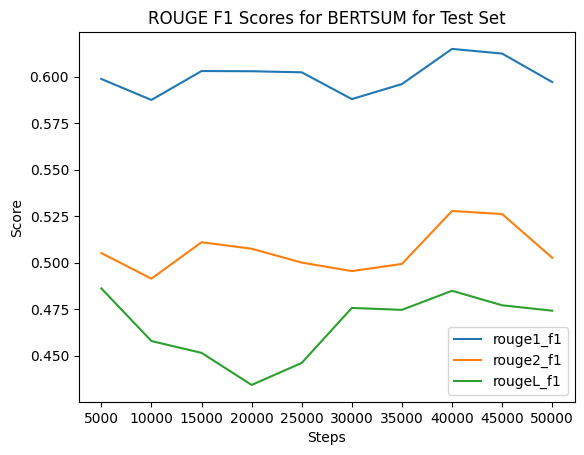

In [13]:
disp_rouge_plot(['rouge1_f1', 'rouge2_f1', 'rougeL_f1'], step_to_df, 'ROUGE F1 Scores for BERTSUM for Test Set')

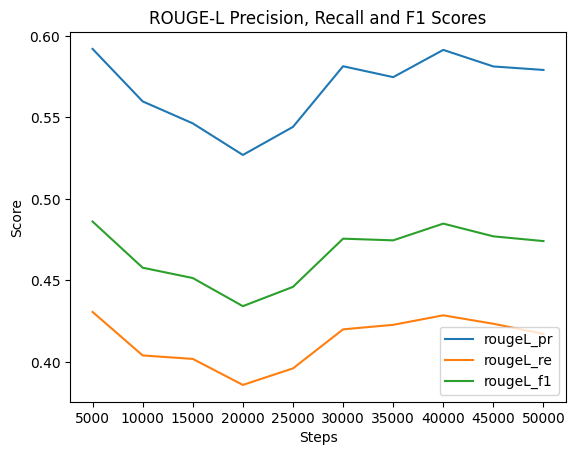

In [14]:
disp_rouge_plot(['rougeL_pr', 'rougeL_re', 'rougeL_f1'], step_to_df, 'ROUGE-L Precision, Recall and F1 Scores')

In [22]:
CWD = os.getcwd()
GPT_RESULTS_DIR = os.path.join(CWD, 'results', 'gpt4o')
df_gpt_ext = pd.read_csv(os.path.join(GPT_RESULTS_DIR, 'test_res_ext_gpt4o_0908_1239.csv'))
df_gpt_ext_preds = pd.read_csv(os.path.join(GPT_RESULTS_DIR, 'test_res_ext_gpt4o_0908_1239.jsonl'))
df_gpt_ext['length_words'] = df_gpt_ext
df_gpt_abs = pd.read_csv(os.path.join(GPT_RESULTS_DIR, 'test_res_abs_gpt4o_0608_2348.csv'))

KeyError: 'summary'

In [17]:
import util_scripts.analysis_utils as au
df_gpt_abs.describe()

,rouge1,rouge2,rougeL,rougeLsum,bertscore_pr,bertscore_re,bertscore_f1,meteor
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.362140,0.095767,0.265640,0.269295,0.863683,0.883517,0.873384,0.340750
std,0.082145,0.065947,0.074331,0.076924,0.016568,0.018554,0.014835,0.099182
min,0.056300,0.000000,0.056300,0.056300,0.821100,0.830500,0.826800,0.134900
25%,0.315800,0.048800,0.219800,0.224700,0.853100,0.872600,0.864900,0.271700
50%,0.357100,0.077900,0.263200,0.263200,0.861400,0.884000,0.873600,0.330200
75%,0.408600,0.137900,0.307700,0.307700,0.873000,0.894700,0.882700,0.384800
max,0.576900,0.288900,0.478300,0.481900,0.913000,0.932300,0.915500,0.687200


In [21]:
step_to_df[40000].describe()

,length_words,rouge1_pr,rouge1_re,rouge1_f1,rouge2_pr,rouge2_re,rouge2_f1,rougeL_pr,rougeL_re,rougeL_f1,rougeLsum_pr,rougeLsum_re,rougeLsum_f1
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,56.119266,0.750011,0.543306,0.614957,0.649665,0.462464,0.527780,0.591465,0.428586,0.484856,0.591465,0.428586,0.484856
std,13.117507,0.206445,0.147109,0.149763,0.258105,0.178055,0.196834,0.209686,0.149722,0.157248,0.209686,0.149722,0.157248
min,32.000000,0.180000,0.245600,0.214300,0.040800,0.060000,0.048800,0.084700,0.129300,0.106400,0.084700,0.129300,0.106400
25%,48.000000,0.625000,0.428600,0.506300,0.440000,0.355300,0.383000,0.434800,0.314000,0.365600,0.434800,0.314000,0.365600
50%,53.000000,0.766700,0.560400,0.647100,0.708300,0.500000,0.582100,0.591800,0.435900,0.483300,0.591800,0.435900,0.483300
75%,64.000000,0.907000,0.637400,0.714300,0.826100,0.583300,0.655500,0.746500,0.534100,0.617600,0.746500,0.534100,0.617600
max,95.000000,1.000000,0.853700,0.910000,1.000000,0.805600,0.885700,1.000000,0.820500,0.901400,1.000000,0.820500,0.901400


In [20]:
df_gpt_ext.describe()

,rouge1_pr,rouge1_re,rouge1_f1,rouge2_pr,rouge2_re,rouge2_f1,rougeL_pr,rougeL_re,rougeL_f1,rougeLsum_pr,rougeLsum_re,rougeLsum_f1,bertscore_pr,bertscore_re,bertscore_f1,meteor
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.545062,0.712881,0.597216,0.445703,0.584331,0.489249,0.498321,0.653030,0.546892,0.522066,0.685147,0.572850,0.892864,0.906489,0.899340,0.630412
std,0.172877,0.168381,0.141043,0.183770,0.205743,0.173766,0.179475,0.190966,0.160820,0.173581,0.180890,0.148617,0.028390,0.033184,0.026308,0.161264
min,0.115400,0.109100,0.112100,0.000000,0.000000,0.000000,0.105900,0.109100,0.112100,0.115400,0.109100,0.112100,0.804400,0.783000,0.804700,0.070000
25%,0.439600,0.597800,0.519600,0.337100,0.437500,0.378100,0.381800,0.532300,0.440300,0.413800,0.557700,0.485800,0.874400,0.886900,0.885200,0.520200
50%,0.552900,0.716700,0.614500,0.439400,0.569200,0.503200,0.484500,0.647100,0.563000,0.531200,0.683300,0.577100,0.892400,0.905500,0.900200,0.635400
75%,0.666700,0.829500,0.701800,0.590400,0.714300,0.619300,0.623000,0.775500,0.659600,0.630100,0.807000,0.681500,0.910400,0.932500,0.918500,0.741100
max,0.934100,1.000000,0.929000,0.900000,0.964300,0.895000,0.934100,1.000000,0.929000,0.934100,1.000000,0.929000,0.970100,0.970200,0.970200,0.935600


In [16]:
cols_to_display = ['rougel_pr', 'rougel_re', 'rougeL_f1']
for col in cols_to_display:
    plt.plot(range(0, len(step_to_df.keys())), [step_to_df[steps][col].mean() for steps in range(5000, 50001, 5000)], label=col)
# plt.scatter(step_to_df[50000].index, step_to_df[50000].sort_values(by='rougeL_f1')['rougeL_f1'])
plt.xlabel("Steps")
plt.ylabel("Score")
plt.xticks(ticks=range(0,10,1), labels=range(5000, 50001, 5000))
plt.title("Mean Scores for BERTSUM for the Test Set")
plt.legend()
plt.show()

KeyError: 'rougel_pr'